In [1]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico 
BASE_PATH = os.getcwd() 
PATH_SVG=BASE_PATH+"/../../../../inkscape/cap6/beam/"
PATH_EPS=BASE_PATH+"/../../../../eps/cap6/beam/"
PATH_PNG=BASE_PATH+"/../../../../figs/cap6/beam/"
fname = "cdl_linear_multiplicate_mpi-openmp_speedup"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
fname_png = PATH_PNG+fname+".png"
PLOT_FIG = True
SAVE_FIG = True 
#########################################################################


#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method - Multiplicate Operations 
df = pd.read_csv('./data/cdl_linear_multiplicate_mpi-openmp.csv')
pd.set_option('expand_frame_repr', False)
df

Num. Nodes  Num. Threads MPI x OpenMP  Num. Procs. MPI x OpenMP  Runtime (s) - P1  Runtime (s) - P2  Runtime (s) - P4  SpeedUp - Pure MPI (P1)  SpeedUp - MPI + OpenMP (P1)  SpeedUp - Pure MPI (P2)  SpeedUp - MPI + OpenMP (P2)  SpeedUp - Pure MPI (P4)  SpeedUp - MPI + OpenMP (P4)  Efficiency - Pure MPI (P1)  Efficiency - MPI + OpenMP (P1)  Efficiency - Pure MPI (P2)  Efficiency - MPI + OpenMP (P2)  Efficiency - Pure MPI (P4)  Efficiency - MPI + OpenMP (P4)
0            1             1          1+1                         1            3.4375           24.3476          505.9082                   1.0000                       1.0000                   1.0000                       1.0000                   1.0000                       1.0000                      1.0000                          1.0000                      1.0000                          1.0000                      1.0000                          1.0000
1            1             2          1+2                         2            1.7608           12.2524          250.5481                      NaN                       1.9523                      NaN                       1.9872                      NaN                       2.0192                         NaN                          0.9762                         NaN                          0.9936                         NaN                          1.0096
2            1             4          1+4                         4            0.8818            6.1521          125.0179                      NaN                       3.8983                      NaN                       3.9576                      NaN                       4.0467                         NaN                          0.9746                         NaN                          0.9894                         NaN                          1.0117
3            1             8          1+8                         8            0.6472            3.2422           63.2576                      NaN                       5.3111                      NaN                       7.5095                      NaN                       7.9976                         NaN                          0.6639                         NaN                          0.9387                         NaN                          0.9997
4            1            16         1+16                        16            0.4073            2.3280           36.4629                      NaN                       8.4398                      NaN                      10.4587                      NaN                      13.8746                         NaN                          0.5275                         NaN                          0.6537                         NaN                          0.8672
5            1            32         1+32                        32            0.2498            1.1931           21.8032                      NaN                      13.7597                      NaN                      20.4073                      NaN                      23.2034                         NaN                          0.4300                         NaN                          0.6377                         NaN                          0.7251
6            2             1          2+1                         2            1.6510           11.6818          244.3565                   2.0821                       2.0821                   2.0842                       2.0842                   2.0704                       2.0704                      1.0411                          1.0411                      1.0421                          1.0421                      1.0352                          1.0352
7            2             2          2+2                         4            0.8576            5.8521          122.7194                      NaN                       4.0082                      NaN                       4.1605                      NaN                       4.1225         

In [2]:
df_p1 = df[df['SpeedUp - MPI + OpenMP (P1)'] == df.groupby(['Num. Nodes'])['SpeedUp - MPI + OpenMP (P1)'].transform(max)]
df_p2 = df[df['SpeedUp - MPI + OpenMP (P2)'] == df.groupby(['Num. Nodes'])['SpeedUp - MPI + OpenMP (P2)'].transform(max)]
df_p4 = df[df['SpeedUp - MPI + OpenMP (P4)'] == df.groupby(['Num. Nodes'])['SpeedUp - MPI + OpenMP (P4)'].transform(max)]
df_p1
df_p1=df_p1.rename(columns={"SpeedUp - MPI + OpenMP (P1)": "P1_SpeedUp_Max"})
df_p2=df_p2.rename(columns={"SpeedUp - MPI + OpenMP (P2)": "P2_SpeedUp_Max"})
df_p4=df_p4.rename(columns={"SpeedUp - MPI + OpenMP (P4)": "P4_SpeedUp_Max"})
df_p1

Num. Nodes  Num. Threads MPI x OpenMP  Num. Procs. MPI x OpenMP  Runtime (s) - P1  Runtime (s) - P2  Runtime (s) - P4  SpeedUp - Pure MPI (P1)  P1_SpeedUp_Max  SpeedUp - Pure MPI (P2)  SpeedUp - MPI + OpenMP (P2)  SpeedUp - Pure MPI (P4)  SpeedUp - MPI + OpenMP (P4)  Efficiency - Pure MPI (P1)  Efficiency - MPI + OpenMP (P1)  Efficiency - Pure MPI (P2)  Efficiency - MPI + OpenMP (P2)  Efficiency - Pure MPI (P4)  Efficiency - MPI + OpenMP (P4)
5            1            32         1+32                        32            0.2498            1.1931           21.8032                      NaN         13.7597                      NaN                      20.4073                      NaN                      23.2034                         NaN                          0.4300                         NaN                          0.6377                         NaN                          0.7251
11           2            32         2+32                        64            0.1255            0.7122           10.0174                      NaN         27.3851                      NaN                      34.1857                      NaN                      50.5030                         NaN                          0.4279                         NaN                          0.5342                         NaN                          0.7891
17           4            32         4+32                       128            0.0644            0.2721            6.2405                      NaN         53.4091                      NaN                      89.4859                      NaN                      81.0682                         NaN                          0.4173                         NaN                          0.6991                         NaN                          0.6333
23           8            32         8+32                       256            0.0362            0.1309            3.2065                      NaN         94.9249                      NaN                     185.9490                      NaN                     157.7752                         NaN                          0.3708                         NaN                          0.7264                         NaN                          0.6163
27          16             8         16+8                       128            0.0690            0.7871            4.8029                      NaN         49.7931                      NaN                      30.9344                      NaN                     105.3336                         NaN                          0.3890                         NaN                          0.2417                         NaN                          0.8229

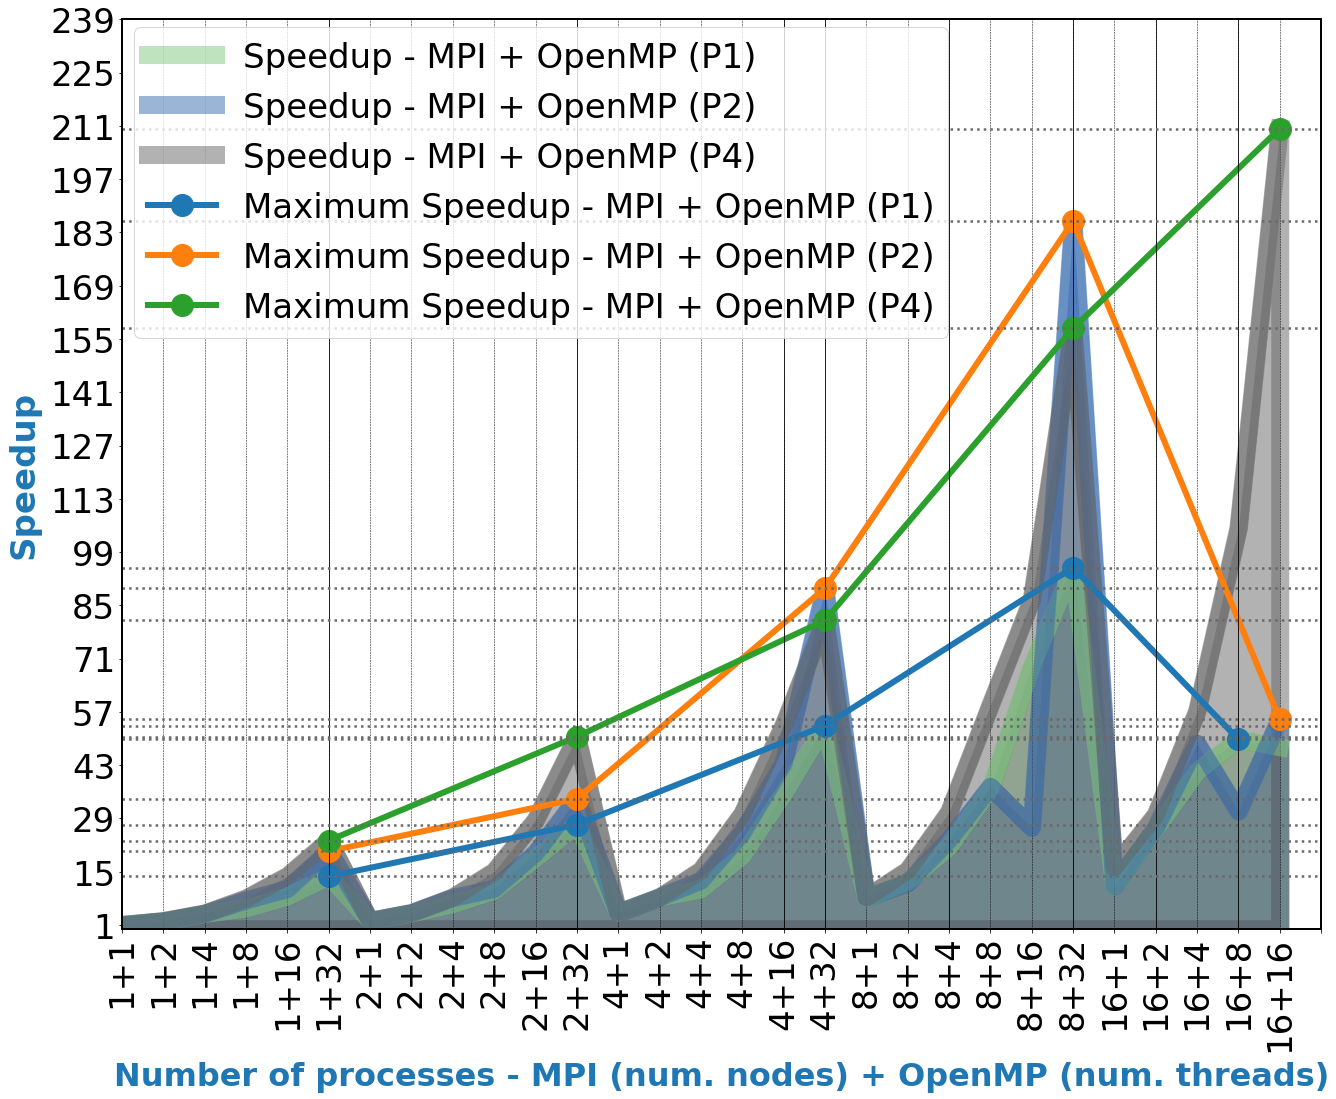

In [3]:
import matplotlib

# Plota a gráfico de area
fig = df[['MPI x OpenMP', 'SpeedUp - MPI + OpenMP (P1)', 'SpeedUp - MPI + OpenMP (P2)', 'SpeedUp - MPI + OpenMP (P4)']].\
plot(kind='area',
     linewidth=18.0, 
     colormap="Accent",
     x='MPI x OpenMP', 
     fontsize=34, 
     figsize=(18, 15),
     stacked=False
).get_figure()


# Plota a gráfico de linhas
ax = fig.gca()
ax.plot(df.loc[df_p1.index, ['SpeedUp - MPI + OpenMP (P1)']],
        marker='o',
        linestyle='-',
        linewidth=6.0, markersize=22)
ax.plot(df.loc[df_p2.index, ['SpeedUp - MPI + OpenMP (P2)']],
         marker='o',
         linestyle='-',
         linewidth=6.0, markersize=22)
ax.plot(df.loc[df_p4.index, ['SpeedUp - MPI + OpenMP (P4)']],
         marker='o',
         linestyle='-',
         linewidth=6.0, markersize=22)

# plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 
           ['1+1', '1+2', '1+4', '1+8', '1+16', '1+32', '2+1', '2+2', '2+4', '2+8', '2+16', '2+32', '4+1', '4+2', '4+4', '4+8', '4+16', '4+32', '8+1', '8+2', '8+4', '8+8', '8+16', '8+32', '16+1', '16+2', '16+4', '16+8', '16+16'], 
           fontsize=34, rotation=90)

n=250
values_sum_2 = [ i for i in range(1,n,14) ]
str_values_sum_2 = [ str(i) for i in values_sum_2 ]
plt.yticks(values_sum_2, str_values_sum_2, fontsize=34)

#   Define as linhas do grid
ax.xaxis.grid(True, linestyle='--', color='k', linewidth='0.5')
lines=[5, 11, 16, 17, 20, 23, 25, 27]
for i in lines:
    ax.axvline(i, linestyle='-', color='k', linewidth='0.8')

lines = df_p1['P1_SpeedUp_Max'].values
for i in lines:
    plt.axhline(i, linestyle=':', color='dimgrey', linewidth='2.5')
lines = df_p2['P2_SpeedUp_Max'].values
for i in lines:
    plt.axhline(i, linestyle=':', color='dimgrey', linewidth='2.5')
lines = df_p4['P4_SpeedUp_Max'].values
for i in lines:
    plt.axhline(i, linestyle=':', color='dimgrey', linewidth='2.5')    
        

#   Plota os labels
plt.tight_layout()

color='tab:blue'
ax.set_xlabel('Number of processes - MPI (num. nodes) + OpenMP (num. threads)', fontweight='bold', fontsize=32, labelpad=10, color=color)
ax.set_ylabel('Speedup', fontweight='bold',  fontsize=34, labelpad=10, color=color)

ax.legend(['Speedup - MPI + OpenMP (P1)', 'Speedup - MPI + OpenMP (P2)', 'Speedup - MPI + OpenMP (P4)', 
           'Maximum Speedup - MPI + OpenMP (P1)', 'Maximum Speedup - MPI + OpenMP (P2)', 
           'Maximum Speedup - MPI + OpenMP (P4)'], frameon=True, fontsize=34, loc=(0.01, 0.65))
fig.set_size_inches(18, 15)

#   Exibe a figura
if (PLOT_FIG):
    plt.show()

In [4]:
#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')
    
    fn = Path(fname_png).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    ax.set_rasterized(True)
    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [5]:
#########################################################################
#   Configurações para salvar e plotar o grafico 
fname = "cdl_linear_multiplicate_mpi-pure_speedup"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
fname_png = PATH_PNG+fname+".png"
#########################################################################


#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method
df = pd.read_csv('./data/cdl_linear_multiplicate_mpi-openmp.csv')
pd.set_option('expand_frame_repr', False)
df

Num. Nodes  Num. Threads MPI x OpenMP  Num. Procs. MPI x OpenMP  Runtime (s) - P1  Runtime (s) - P2  Runtime (s) - P4  SpeedUp - Pure MPI (P1)  SpeedUp - MPI + OpenMP (P1)  SpeedUp - Pure MPI (P2)  SpeedUp - MPI + OpenMP (P2)  SpeedUp - Pure MPI (P4)  SpeedUp - MPI + OpenMP (P4)  Efficiency - Pure MPI (P1)  Efficiency - MPI + OpenMP (P1)  Efficiency - Pure MPI (P2)  Efficiency - MPI + OpenMP (P2)  Efficiency - Pure MPI (P4)  Efficiency - MPI + OpenMP (P4)
0            1             1          1+1                         1            3.4375           24.3476          505.9082                   1.0000                       1.0000                   1.0000                       1.0000                   1.0000                       1.0000                      1.0000                          1.0000                      1.0000                          1.0000                      1.0000                          1.0000
1            1             2          1+2                         2            1.7608           12.2524          250.5481                      NaN                       1.9523                      NaN                       1.9872                      NaN                       2.0192                         NaN                          0.9762                         NaN                          0.9936                         NaN                          1.0096
2            1             4          1+4                         4            0.8818            6.1521          125.0179                      NaN                       3.8983                      NaN                       3.9576                      NaN                       4.0467                         NaN                          0.9746                         NaN                          0.9894                         NaN                          1.0117
3            1             8          1+8                         8            0.6472            3.2422           63.2576                      NaN                       5.3111                      NaN                       7.5095                      NaN                       7.9976                         NaN                          0.6639                         NaN                          0.9387                         NaN                          0.9997
4            1            16         1+16                        16            0.4073            2.3280           36.4629                      NaN                       8.4398                      NaN                      10.4587                      NaN                      13.8746                         NaN                          0.5275                         NaN                          0.6537                         NaN                          0.8672
5            1            32         1+32                        32            0.2498            1.1931           21.8032                      NaN                      13.7597                      NaN                      20.4073                      NaN                      23.2034                         NaN                          0.4300                         NaN                          0.6377                         NaN                          0.7251
6            2             1          2+1                         2            1.6510           11.6818          244.3565                   2.0821                       2.0821                   2.0842                       2.0842                   2.0704                       2.0704                      1.0411                          1.0411                      1.0421                          1.0421                      1.0352                          1.0352
7            2             2          2+2                         4            0.8576            5.8521          122.7194                      NaN                       4.0082                      NaN                       4.1605                      NaN                       4.1225         

In [6]:
# print(df.columns)
aggregate_operations = {
    'Num. Nodes':'first', 
    'SpeedUp - Pure MPI (P1)':'max', 
    'SpeedUp - Pure MPI (P2)':'max', 
    'SpeedUp - Pure MPI (P4)':'max',
}
df_result = df.groupby('Num. Nodes').agg(aggregate_operations)
df_result

Num. Nodes  SpeedUp - Pure MPI (P1)  SpeedUp - Pure MPI (P2)  SpeedUp - Pure MPI (P4)
Num. Nodes                                                                                       
1                    1                   1.0000                   1.0000                   1.0000
2                    2                   2.0821                   2.0842                   2.0704
4                    4                   4.1867                   4.1797                   4.1679
8                    8                   7.9937                   8.1714                   8.2706
16                  16                  11.3163                  11.3583                  16.2041

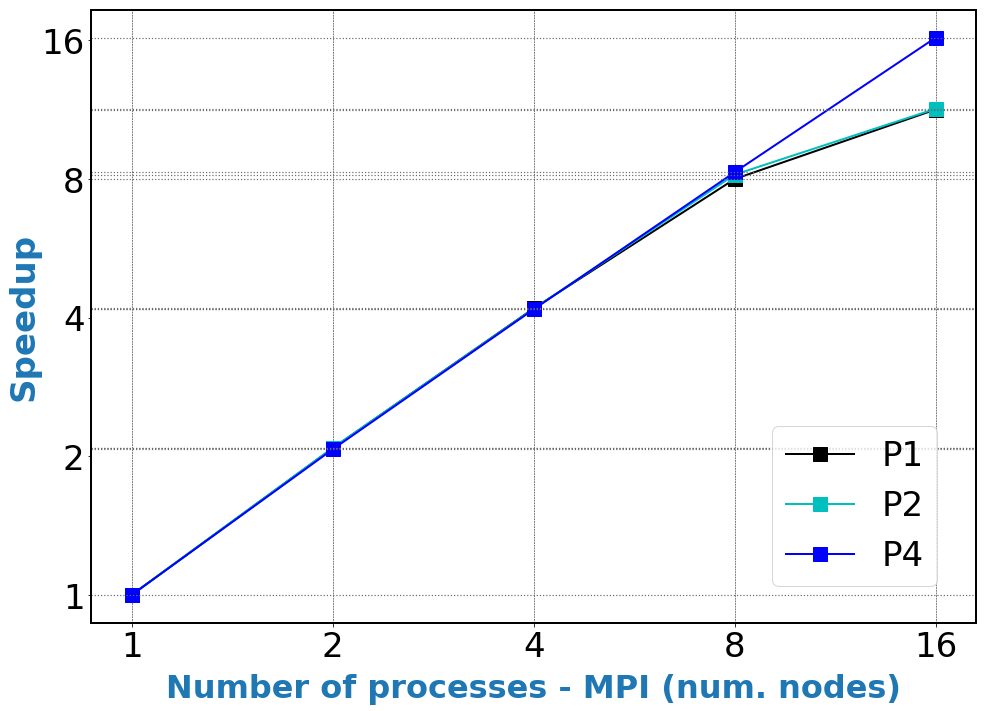

In [7]:
#   Aloca figura para permitir alteracao
fig, ax = plt.subplots()

#   Plotar os valores dos graficos
ax.plot(df_result['Num. Nodes'], df_result['SpeedUp - Pure MPI (P1)'], marker='s', markersize=14, color='k', linewidth=2)
ax.plot(df_result['Num. Nodes'], df_result['SpeedUp - Pure MPI (P2)'], marker='s', markersize=14, color='c', linewidth=2)
ax.plot(df_result['Num. Nodes'], df_result['SpeedUp - Pure MPI (P4)'], marker='s', markersize=14, color='b', linewidth=2)

plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16], [1, 2, 4, 8, 16], fontsize=34)
plt.yticks([1, 2, 4, 8, 16], [1, 2, 4, 8, 16], fontsize=34)


#   Define as linhas do grid
ax.xaxis.grid(True, linestyle='--', color='k', linewidth='0.5')

lines = list(df_result['SpeedUp - Pure MPI (P1)'].values) + list(df_result['SpeedUp - Pure MPI (P2)'].values) +\
        list(df_result['SpeedUp - Pure MPI (P4)'].values)    
lines = sorted(set(lines))
for i in lines:
    plt.axhline(i, linestyle=':', color='dimgrey', linewidth='1.2')  
        
#  Plota os labels
plt.tight_layout()
color='tab:blue'
ax.set_xlabel('Number of processes - MPI (num. nodes)', fontweight='bold', fontsize=32, labelpad=10, color=color)
ax.set_ylabel('Speedup', fontweight='bold',  fontsize=34, labelpad=1, color=color)

ax.legend(['P1', 'P2', 'P4'], frameon=True, fontsize=34, loc=(0.77, 0.06))
fig.set_size_inches(15, 11)

#   Exibe a figura
if (PLOT_FIG):
    plt.show()

In [8]:
#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')
    
    fn = Path(fname_png).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    ax.set_rasterized(True)
    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>